<a href="https://colab.research.google.com/github/mmatera/Spin-Chains-/blob/main/corr_xop_v._pop_Heisenberg_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://qutip.org/docs/latest/guide/dynamics/dynamics-master.html

In [2]:
!pip install matplotlib
!pip install qutip
!pip install numpy 

     |████████████████████████████████| 14.7 MB 4.7 MB/s 


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import cmath 
from qutip import *

In [4]:
### XYZ Heisenberg model

solver = "me"   
N = 5            # número de spines

h  = 1.0 * 2 * np.pi * np.ones(N) 
Jz = 0.1 * 2 * np.pi * np.ones(N)
Jx = 0.15 * 2 * np.pi * np.ones(N)
Jy = 0.25 * 2 * np.pi * np.ones(N)

In [5]:
def hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver):
    
    id2 = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()

    sx_list = []
    sy_list = []
    sz_list = []

    for n in range(N):
        operator_list = []
        for m in range(N):
            operator_list.append(id2)
        operator_list[n] = sx
        sx_list.append(tensor(operator_list))
        
        operator_list[n] = sy
        sy_list.append(tensor(operator_list))
        
        operator_list[n] = sz
        sz_list.append(tensor(operator_list))

    sxsx_list = [sx_list[n]*sx_list[m] for n in range(N) for m in range(N)]
    sysy_list = [sy_list[n]*sy_list[m] for n in range(N) for m in range(N)]
        
    # no es terriblemente eficiente pero funca al menos
    # for n in range(N):
    #  for m in range(N):
    #    sxsx_list.append(sx_list[n]*sx_list[m])
    #    sysy_list.append(sy_list[n]*sy_list[m])

    # Constructing the Hamiltonian
    
    H = 0
    
    for n in range(N):
        H += -0.5*h[n]*sz_list[n]
        
    for n in range(N-1):
        H += -0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
        H += -0.5 * Jy[n] * sy_list[n] * sy_list[n+1]
        H += -0.5 * Jz[n] * sz_list[n] * sz_list[n+1]
    
    # collapse operators
    c_op_list = []

    # spin dephasing
    for n in range(N):
        if gamma[n] > 0.0:
            c_op_list.append(np.sqrt(gamma[n]) * sz_list[n])
    
    if solver == "me":
        result_spin_ops = mesolve(H, psi0, tlist, c_op_list, sysy_list)
    elif solver == "mc":
        ntraj = 200 
        result_spin_ops = mcsolve(H, psi0, tlist, c_op_list, sz_list)

# sxsx_list + sysy_list+  sz_list 

    return result_spin_ops.expect


In [6]:
# dephasing rate
gamma = 5 * 10**-10* np.ones(N)

# intial state, first spin in state |1>, the rest in state |0>
psi_list = []
for n in range(2):
    psi_list.append(basis(2,0))
psi_list.append(basis(2,1))
for n in range(2):
    psi_list.append(basis(2,0))
psi0 = tensor(psi_list)

tlist = np.linspace(0, 10, 100)

results = hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver)

sxsx_results = results
#sysy_results = results.expect[1]
#sz_results = results

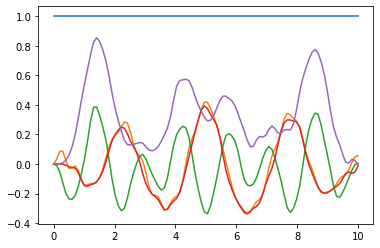

In [7]:
#sigma_x sigmax evolucionado 
fig, ax = plt.subplots()

for n in range(N):
    ax.plot(tlist, np.real(sxsx_results[n]))

plt.show()


In [8]:
# dephasing rate
gamma = 5 * 10**-10* np.ones(N)

# intial state, first spin in state |1>, the rest in state |0>
psi_list = []
for n in range(2):
    psi_list.append(basis(2,0))
psi_list.append(basis(2,1))
for n in range(2):
    psi_list.append(basis(2,0))
psi0 = tensor(psi_list)

tlist = np.linspace(0, 10, 100)

results = hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver)

#sxsx_results = results.expect[0]
sysy_results = results
#sz_results = results

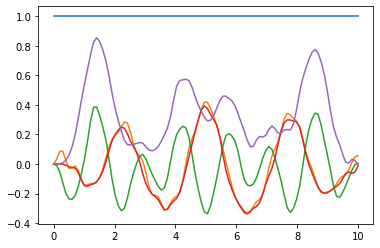

In [10]:
# sigma_y sigma_y evolucionado
fig, ax = plt.subplots()

for n in range(N):
    ax.plot(tlist, np.real(sysy_results[n]))

plt.show()


In [18]:
# dephasing rate
gamma = 5 * 10**-10* np.ones(N)

# intial state, first spin in state |1>, the rest in state |0>
psi_list = []
for n in range(2):
    psi_list.append(basis(2,0))
psi_list.append(basis(2,1))
for n in range(2):
    psi_list.append(basis(2,0))
psi0 = tensor(psi_list)

tlist = np.linspace(0, 10, 100)

results = hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver)

#sxsx_results = results.expect[0]
#sysy_results = results.expect[1]
sz_results = results

NameError: ignored

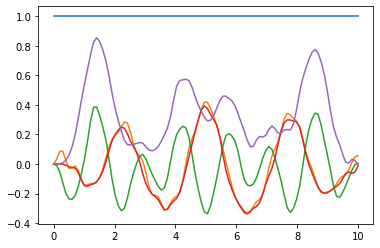

In [12]:
#sigma_z evolucionado 
fig, ax = plt.subplots()

for n in range(N):
    ax.plot(tlist, np.real(sz_results[n]))

plt.show()


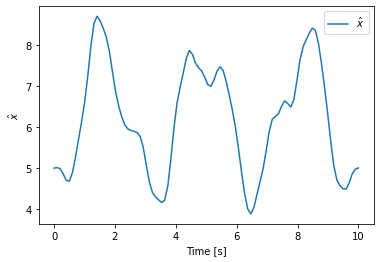

In [13]:
#x_op = sum((.5 + sz_results[i])*i for i in range(N))

x_op_expt = sum((.5 + sz_results[i]) * i for i in range(N))


fig,ax = plt.subplots()
ax.plot(tlist, x_op_expt, label=r'$\hat{x}$')

ax.legend(loc=0)
ax.set_xlabel(r'Time [s]')
ax.set_ylabel(r'$\hat{x}$')
plt.show()

In [15]:
sxsx_list[1]

NameError: ignored

In [134]:
def hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma=1e-10, solver="me"):
    
    id2 = qeye(2)
    sx = .5*sigmax()
    sy = .5*sigmay()
    sz = .5*sigmaz()

    sx_list = []
    sy_list = []
    sz_list = []

    for n in range(N):
        operator_list = []
        for m in range(N):
            operator_list.append(id2)
        operator_list[n] = sx
        sx_list.append(tensor(operator_list))
        
        operator_list[n] = sy
        sy_list.append(tensor(operator_list))
        
        operator_list[n] = sz
        sz_list.append(tensor(operator_list))

        
    def W(a,b): 
        return sum(np.exp(1j * k * 2 * np.pi * (a-b) * N**-1)*(k*2*np.pi*(N**-1) -2.4) for k in range(N))/N


    # no es terriblemente eficiente pero funca al menos
    # for n in range(N):
    #  for m in range(N):
    #    sxsx_list.append(sx_list[n]*sx_list[m])
    #    sysy_list.append(sy_list[n]*sy_list[m])

    # Constructing the Hamiltonian
    
    H = 0
    
    for n in range(N):
        H += -0.5*h[n]*sz_list[n]
        
    for n in range(N-1):
        H += -0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
        H += -0.5 * Jy[n] * sy_list[n] * sy_list[n+1]
        H += -0.5 * Jz[n] * sz_list[n] * sz_list[n+1]

    x_op = sum((.5 - sz_list[i])*i for i in range(N))
    p_op = 1j*(x_op*H-H*x_op)
    # p_op = sum(W(i,j)*(sx_list[i]*sx_list[j]+sy_list[i]*sy_list[j]) for i in range(N) for j in range(N))
    corr_op = .5*(x_op*p_op+p_op*x_op)
    comm_op = -1j*(x_op*p_op-p_op*x_op)

    # collapse operators
    c_op_list = []

    # spin dephasing
    for n in range(N):
        if gamma[n] > 0.0:
            c_op_list.append(np.sqrt(gamma[n]) * sz_list[n])
    obs = [x_op, p_op, x_op**2,p_op**2, corr_op, comm_op]
    if solver == "me":
        result_spin_ops = mesolve(H, psi0, tlist, c_op_list, obs)
    elif solver == "mc":
        ntraj = 200 
        result_spin_ops = mcsolve(H, psi0, tlist, c_op_list, sz_list)

# sxsx_list + sysy_list+  sz_list 

    return result_spin_ops.expect



# dephasing rate
gamma = 5 * 10**-10* np.ones(N)

# intial state, first spin in state |1>, the rest in state |0>
psi_list = []
for n in range(2):
    psi_list.append(basis(2,0))
psi_list.append(basis(2,1))
for n in range(2):
    psi_list.append(basis(2,0))
psi0 = tensor(psi_list)

tlist = np.linspace(0, 10, 1000)

results = hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver)

#sxsx_results = results.expect[0]
#sysy_results = results.expect[1]
sz_results = results



In [135]:
results[5]

array([ 0.00000000e+00, -1.89251379e-04, -7.56281945e-04, -1.69884140e-03,
       -3.01343141e-03, -4.69508436e-03, -6.73738760e-03, -9.13244605e-03,
       -1.18711095e-02, -1.49428893e-02, -1.83360731e-02, -2.20376807e-02,
       -2.60335850e-02, -3.03084948e-02, -3.48461028e-02, -3.96290471e-02,
       -4.46390990e-02, -4.98571332e-02, -5.52632330e-02, -6.08367743e-02,
       -6.65564698e-02, -7.24004869e-02, -7.83465861e-02, -8.43721167e-02,
       -9.04541286e-02, -9.65694600e-02, -1.02694813e-01, -1.08806858e-01,
       -1.14882371e-01, -1.20898262e-01, -1.26831685e-01, -1.32660114e-01,
       -1.38361448e-01, -1.43914089e-01, -1.49297010e-01, -1.54489864e-01,
       -1.59473057e-01, -1.64227782e-01, -1.68736140e-01, -1.72981207e-01,
       -1.76946988e-01, -1.80618565e-01, -1.83982173e-01, -1.87025256e-01,
       -1.89736528e-01, -1.92106034e-01, -1.94125029e-01, -1.95786123e-01,
       -1.97083353e-01, -1.98012094e-01, -1.98569131e-01, -1.98752720e-01,
       -1.98562495e-01, -

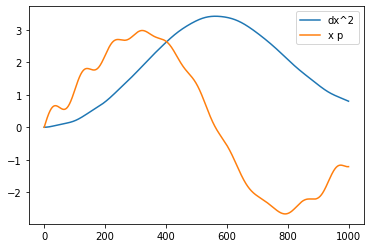

In [136]:
#plt.plot(results[0],label="x")
#plt.plot(results[1],label="p")
plt.plot(results[2]-results[0]**2,label="dx^2")
#plt.plot(results[3]-results[1]**2,label="dp^2")
plt.plot(-6*(results[4]-results[0]*results[1]),label="x p ")
# plt.plot(results[5],label="[x ,p]")
#plt.plot(results[3],label="comm")
plt.legend()

In [14]:

hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma=1e-10, solver="me")


corr_xop_pop = [.5*(x_op[i] * p_op[i] + p_op[i] * x_op[i]) for i in range(len(x_op))]


NameError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


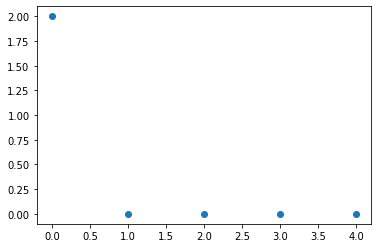

In [88]:
def W(a, N): 
  return sum(np.exp(1j * k * 2 * np.pi * (a) * N**-1)*(2) for k in range(N))/N

plt.scatter([a for a in range(5)],[W(a, 5) for a in range(5)])

In [ ]:
def hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver):
    
    id2 = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()

    sx_list = []
    sy_list = []
    sz_list = []

    for n in range(N):
        operator_list = []
        for m in range(N):
            operator_list.append(id2)
        operator_list[n] = sx
        sx_list.append(tensor(operator_list))
        
        operator_list[n] = sy
        sy_list.append(tensor(operator_list))
        
        operator_list[n] = sz
        sz_list.append(tensor(operator_list))

    sxsx_list = []
    sysy_list = []
    
    # no es terriblemente eficiente pero funca al menos
    for n in range(N):
      for m in range(N):
        sxsx_list.append(sx_list[n]*sx_list[m])
        sysy_list.append(sy_list[n]*sy_list[m])
  
    # Constructing the Hamiltonian
    
    H = 0
    
    for n in range(N):
        H += -0.5*h[n]*sz_list[n]
        
    for n in range(N-1):
        H += -0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
        H += -0.5 * Jy[n] * sy_list[n] * sy_list[n+1]
        H += -0.5 * Jz[n] * sz_list[n] * sz_list[n+1]
    
    # collapse operators
    c_op_list = []

    # spin dephasing
    for n in range(N):
        if gamma[n] > 0.0:
            c_op_list.append(np.sqrt(gamma[n]) * sz_list[n])
    
    if solver == "me":
        result_spin_ops = mesolve(H, psi0, tlist, c_op_list, sxsx_list)
    elif solver == "mc":
        ntraj = 200 
        result_spin_ops = mcsolve(H, psi0, tlist, c_op_list, sxsx_list, ntraj)

    return sxsx_list


In [ ]:
# dephasing rate
gamma = 5 * 10**-10* np.ones(N)

# intial state, first spin in state |1>, the rest in state |0>
psi_list = []
for n in range(2):
    psi_list.append(basis(2,0))
psi_list.append(basis(2,1))
for n in range(2):
    psi_list.append(basis(2,0))
psi0 = tensor(psi_list)

tlist = np.linspace(0, 10, 100)

spin_ops_expt = hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver)


In [ ]:
print(spin_ops_expt)

In [ ]:
from cmath import * 
from math import * 

def W(a,b, k_max): 
  return sum(e**(1j * k * (a-b))*k for k in range(k_max))

W(1,1, 10)

In [ ]:
x_op = sum((.5 + sz_expt[i])*i for i in range(N))

def W(a,b, k_max): 
  return sum(e**(1j * k * 2 * pi * (a-b) * N**-1)*(k*2*pi*N**-1) for k in range(k_max))

p_op = np.real(sum(W(i,j,10)*(sx_expt[i]*sx_expt[j]+sy_expt[i]*sy_expt[j]) for i in range(N) for j in range(N)))

corr_xop_pop = .5*(x_op * p_op + p_op * x_op)


In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(tlist, x_op-10.95, label=r'$\hat{x}= \langle \sum_{a}(\sigma_z^{(a)}+1/2)*a\rangle - 10.95$')
ax.plot(tlist, p_op, label=r'$\hat{p}= \langle \sum_{a,b}W(a,b,k_{max})(\sigma_x^{(a)}\sigma_x^{(b)}+\sigma_y^{(a)}\sigma_y^{(b)}}))\rangle$')

ax.legend(loc=0)
ax.set_xlabel(r'Time [s]')
ax.set_ylabel(r'$\langle\sigma_z\rangle$')
ax.set_title(r'Dynamics of a Heisenberg spin chain for N=5 spins and $\gamma = 5\times 10^{-10} $');

In [ ]:
 fig, ax = plt.subplots(figsize=(10,6))

for n in range(N):
    ax.plot(tlist, np.real(sz_expt[n]), label=r'$\langle\sigma_z^{(%d)}\rangle$'%n)

ax.legend(loc=0)
ax.set_xlabel(r'Time [s]')
ax.set_ylabel(r'$\langle\sigma_z\rangle$')
ax.set_title(r'Dynamics of a Heisenberg spin chain for N=5 spins and $\gamma = 5\times 10^{-10} $');

Here we are interested in computing the following expression

$$
\mu_X = \frac{\bigg(\sum_{i=1}^N\langle s_z^i \rangle+ \frac{1}{2}\bigg)i}{\sum_{i=1}^N\langle s_z^i \rangle+ \frac{1}{2}}
$$

and the standard deviation is 


$$
\sigma^2_X= \frac{\bigg(\sum_{i=1}^N\langle s_{z}^{i} \rangle+ \frac{1}{2}\bigg)i^2}{\sum_{i=1}^N\langle s_z^i \rangle+ \frac{1}{2}} - \bigg[\frac  {\bigg(\sum_{i=1}^N\langle s_{z}^{i} \rangle+ \frac{1}{2}\bigg)i}{\sum_{i=1}^N\langle s_z^i \rangle+ \frac{1}{2}}\bigg]^2
$$

In [ ]:
denom_muX = sum(.5*(1-sz_expt[i]) for i in range(5))
mu_X= sum(.5*(1-sz_expt[i])*i for i in range((5)))/denom_muX
std_devX_term1 = sum(.5*(1-sz_expt[i])*i**2 for i in range((5)))/denom_muX
std_devX_term2 = mu_X**2

std_devX = std_devX_term1 + std_devX_term2


plt.plot(std_devX)

In [ ]:
def func(x,y):
  return x+y, x+y**2

a, b = func(2,3)
c, d = func(1,1) 
a, b = func(a+b,c+d)

In [ ]:
A=[1,2]
B=[2,1]

l = []
for i in range(2):
  for j in range(2):
   l.append(A[i]*B[j])

l

In [ ]:
A=[1,2]
B=[2,1]

l = []
for i in range(2):
   l.append(A[i]*B[i])

l